In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def criar_mochilas():
    mochilas = list(product([0, 1], repeat=items))
    return mochilas

def calcular_peso(mochila):
    total = sum(pesos[i] for i in range(items) if mochila[i] == 1)
    return total

def calcular_valor(mochila):
    total = sum(valores[i] for i in range(items) if mochila[i] == 1)
    return total

def print_mochilas(mochilas):
    for mochila in mochilas:
        peso_atual = calcular_peso(mochila)
        valor_atual = calcular_valor(mochila)
        print("Mochila:", mochila)
        print("Peso total: {}, Valor total: {}".format(peso_atual, valor_atual))


def remover_invalidas(mochilas):
    validas = []
    for mochila in mochilas:
        if calcular_peso(mochila) <= capacidade_mochila:
            validas.append(mochila)
    return validas

def calcular_valores(mochilas):
    valores_calculados = []
    for mochila in mochilas:
        valor_atual = calcular_valor(mochila)
        valores_calculados.append(valor_atual)
    return valores_calculados

def calcular_pesos(mochilas):
    valores_calculados = []
    for mochila in mochilas:
        valor_atual = calcular_peso(mochilas)
        valores_calculados.append(valor_atual)
    return valores_calculados


def plot_graph(lista, label, title):
    x_axys = list(range(0, len(lista)))
    y_axys = lista

    plt.figure()
    plt.plot(x_axys, y_axys)
    plt.scatter(x_axys, y_axys, marker='o') # type: ignore

    plt.xticks(x_axys)
    plt.yticks(np.arange(-1, max(lista))+1)

    plt.xlabel("Mochilas")
    plt.ylabel(label)
    plt.title(title)

def funcao_avaliacao(mochila):
    peso = calcular_peso(mochila)
    valor = calcular_valor(mochila)
    if(debug):
        print("--> Avaliando: A mochila", mochila, "tem peso", peso)
        print("--> Avaliando: A mochila", mochila, "tem peso", valor)
    if(peso <= capacidade_mochila):
        return valor
    else:
        return 0
    
# Função para gerar candidatos vizinhos
def gerar_vizinhos(pos_atual, raio, total):
    vizinhos = []

    inicio = max(0, pos_atual - raio)
    fim = min(total, pos_atual + raio + 1)

    for x in range(inicio, fim):  # type: ignore
        vizinhos.append(x)
    return vizinhos

def busca_em_feixe(mochilas):
    # Inicialização: Gere candidatos iniciais aleatórios
    feixe = [random.randint(0, len(mochilas)-1) for _ in range(largura_do_feixe)]
    
    if(debug):
        print("--> Feixe inicial:", feixe)

    for iteracao in range(num_iteracoes):
        if(debug):
            print("--> Feixe atual:", feixe)

        novos_feixes = []
        
        for candidato in feixe:
            vizinhos = gerar_vizinhos(candidato, raio_vizinhos, len(mochilas))
            if(debug):
                print("--> Posição atual:", candidato)
                print("--> Vizinhos gerados:", vizinhos)

            melhor_vizinho = []
            
            melhores = {}
            for v in vizinhos:
                melhores[v] = funcao_avaliacao(mochilas[v])
            
            melhor_vizinho = max(melhores, key=melhores.get) # type: ignore
            if(debug):
                print("--> Melhores vizinhos:", melhores)
                print("--> Melhor vizinho:", melhor_vizinho)
            
            novos_feixes.append(melhor_vizinho)

        # Seleção: Mantenha os melhores candidatos com base na função de avaliação
        novos = {}
        for v in novos_feixes:
            novos[v] = funcao_avaliacao(mochilas[v])
        novos_feixes = sorted(novos, key=novos.get, reverse=True)[:largura_do_feixe]  # type: ignore
        # print(novos_feixes)

        if(debug):
            print("--> Novo feixe:", novos_feixes)

        # Atualização do feixe
        feixe = novos_feixes
    
    # Impressão do resultado
    melhores_candidatos = {}
    for candidato in feixe:
        melhores_candidatos[candidato] = funcao_avaliacao(mochilas[candidato])

    melhor_candidato = max(melhores_candidatos, key=melhores_candidatos.get) # type: ignore
    peso_do_melhor = calcular_peso(mochilas[melhor_candidato])
    valor_do_melhor = calcular_valor(mochilas[melhor_candidato])


    print("Melhor mochila encontrada:", mochilas[melhor_candidato])
    print("Posicao no grafico:", melhor_candidato)
    print("Peso da mochila encontrada:", peso_do_melhor)
    print("Valor da mochila encontrada:", valor_do_melhor)

----------
Solucao para todas as 32 mochilas possiveis:
Melhor mochila encontrada: (1, 1, 0, 1, 0)
Posicao no grafico: 26
Peso da mochila encontrada: 10
Valor da mochila encontrada: 15
----------
Solucao para todas as 17 mochilas validas:
Melhor mochila encontrada: (0, 0, 1, 0, 1)
Posicao no grafico: 4
Peso da mochila encontrada: 10
Valor da mochila encontrada: 14


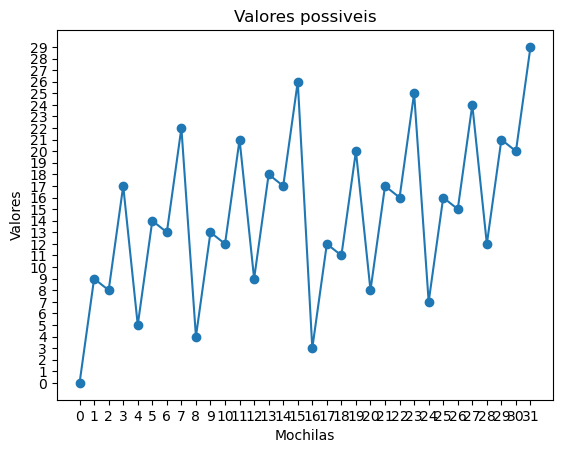

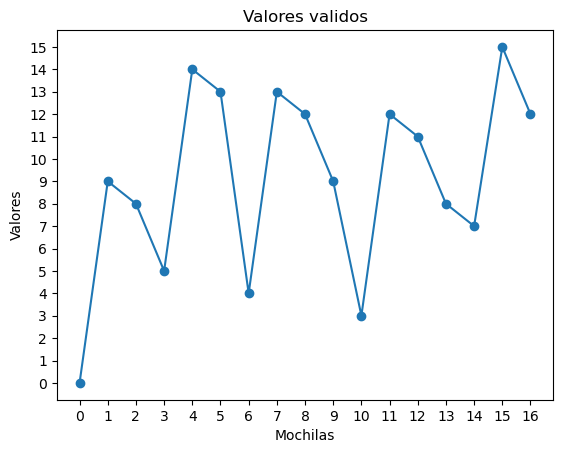

In [230]:
# ---------------------------- #
debug = False

# Parâmetros do problema da mochila
pesos = [2, 3, 4, 5, 6]
valores = [3, 4, 5, 8, 9]
capacidade_mochila = 10
items = 5

# Parâmetros da busca em feixe
largura_do_feixe = 5
num_iteracoes = 3000
raio_vizinhos = 5

# Criação das mochilas
mochilas_possiveis = criar_mochilas()
valores_possiveis = calcular_valores(mochilas_possiveis)
pesos_possiveis = calcular_pesos(mochilas_possiveis)

mochilas_validas = remover_invalidas(mochilas_possiveis)
valores_validos = calcular_valores(mochilas_validas)

print("----------")
print("Solucao para todas as {} mochilas possiveis:".format(len(mochilas_possiveis)))
busca_em_feixe(mochilas_possiveis)
plot_graph(valores_possiveis, "Valores", "Valores possiveis")

print("----------")
print("Solucao para todas as {} mochilas validas:".format(len(mochilas_validas)))
busca_em_feixe(mochilas_validas)
plot_graph(valores_validos, "Valores", "Valores validos")

# plt.show()